In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d.art3d import Line3DCollection

import pandas as pd
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import axes3d

import ipywidgets as widgets

In [3]:
# If widgets are not rendering or interactivity is not working
# https://github.com/jupyterlab/jupyterlab/issues/12580

In [250]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
import numpy as np

class InteractivePlotter:
    def __init__(self, dataframe):
        self.dataframe = dataframe

        # Enable interactive features
        %matplotlib widget

    def plot_3d_line(self, columns_to_include=None, add_average=False, scale_factor=None, show_original=False, years_subset=None):
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')

        if years_subset is None:
            years_subset = self.dataframe.index

        if columns_to_include is None:
            columns_to_include = self.dataframe.columns

        for i, column in enumerate(columns_to_include):
            if column in self.dataframe.columns:
                values = self.dataframe[column].loc[years_subset].values

                if show_original:
                    ax.plot(years_subset, np.full_like(years_subset, i), values, label=f'{column} Original', linestyle='-', color='green')

                if scale_factor is not None:
                    scaled_values = values * scale_factor
                    ax.plot(years_subset, np.full_like(years_subset, i), scaled_values, label=f'{column} Scaled', linestyle='-', color='blue')

                    if add_average:
                        average_value = scaled_values.mean()
                        ax.plot(years_subset, np.full_like(years_subset, i), np.full_like(years_subset, average_value), linestyle='--', color='black', label=f'{column} Average')

                elif add_average:
                    average_value = values.mean()
                    ax.plot(years_subset, np.full_like(years_subset, i), np.full_like(years_subset, average_value), linestyle='--', color='black', label=f'{column} Average')

        ax.set_xlabel('Year')
        ax.set_ylabel('Columns')
        ax.set_zlabel('Values')
        ax.set_title('3D Line Plot of Time Series Data')

        # Set y-axis ticks and labels using column names
        ax.set_yticks(np.arange(len(columns_to_include)))
        ax.set_yticklabels(columns_to_include)

        ax.legend()
        plt.show()

    def plot_3d_bar(self, columns_to_include=None, scale_factor=None, show_original=False, years_subset=None):
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')

        if years_subset is None:
            years_subset = self.dataframe.index

        if columns_to_include is None:
            columns_to_include = self.dataframe.columns

        values = np.array(self.dataframe[columns_to_include].loc[years_subset].values)

        xpos, ypos = np.meshgrid(range(len(years_subset)), range(len(columns_to_include)), indexing="ij")
        xpos = xpos.ravel()
        ypos = ypos.ravel()
        zpos = np.zeros_like(xpos)

        dx = dy = 0.4  # Adjust the width of the bars
        dz_original = values.ravel()

        if scale_factor is not None:
            dz_scaled = values.ravel() * scale_factor
            colors_scaled = cm.Dark2(np.linspace(0, 1, len(columns_to_include)))

            for i, (column, color_scaled) in enumerate(zip(columns_to_include, colors_scaled)):
                ax.bar3d(xpos[i::len(columns_to_include)], ypos[i::len(columns_to_include)] + dy, zpos[i::len(columns_to_include)], dx, dy, dz_scaled[i::len(columns_to_include)], shade=True, color=color_scaled, label=f'{column} Scaled')

        colors_original = cm.viridis(np.linspace(0, 1, len(columns_to_include)))

        for i, (column, color_original) in enumerate(zip(columns_to_include, colors_original)):
            ax.bar3d(xpos[i::len(columns_to_include)], ypos[i::len(columns_to_include)], zpos[i::len(columns_to_include)], dx, dy, dz_original[i::len(columns_to_include)], shade=True, color=color_original, label=f'{column} Original')

        ax.set_xlabel('Year')
        ax.set_ylabel('Columns')
        ax.set_zlabel('Values')
        ax.set_title('3D Bar Chart of Time Series Data')

        ax.set_xticks(np.arange(len(years_subset)) + 0.4)
        ax.set_xticklabels(years_subset)
        ax.set_yticks(np.arange(len(columns_to_include)) + 0.4)
        ax.set_yticklabels(columns_to_include)

        ax.legend()
        plt.show()

    def plot_3d_stem(self, columns_to_include=None, add_average=False, scale_factor=None, show_original=False, years_subset=None):
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')

        if years_subset is None:
            years_subset = self.dataframe.index

        if columns_to_include is None:
            columns_to_include = self.dataframe.columns

        for i, column in enumerate(columns_to_include):
            if column in self.dataframe.columns:
                values = self.dataframe[column].loc[years_subset].values

                if show_original:
                    ax.stem(years_subset, np.full_like(years_subset, i), values, label=f'{column} Original', basefmt='k-', linefmt='--', markerfmt='o')

                if scale_factor is not None:
                    scaled_values = values * scale_factor
                    ax.plot(years_subset, np.full_like(years_subset, i), scaled_values, label=f'{column} Scaled', linestyle='-', color='blue', marker='o')

                    if add_average:
                        average_value = scaled_values.mean()
                        ax.plot(years_subset, np.full_like(years_subset, i), np.full_like(years_subset, average_value), linestyle='--', color='red', label=f'{column} Average')

                elif add_average:
                    average_value = values.mean()
                    ax.plot(years_subset, np.full_like(years_subset, i), np.full_like(years_subset, average_value), linestyle='--', color='red', label=f'{column} Average')

        ax.set_xlabel('Year')
        ax.set_ylabel('Columns')
        ax.set_zlabel('Values')
        ax.set_title('3D Stem Plot of Time Series Data')

        # Set y-axis ticks and labels using column names
        ax.set_yticks(np.arange(len(columns_to_include)))
        ax.set_yticklabels(columns_to_include)

        ax.legend()
        plt.show()


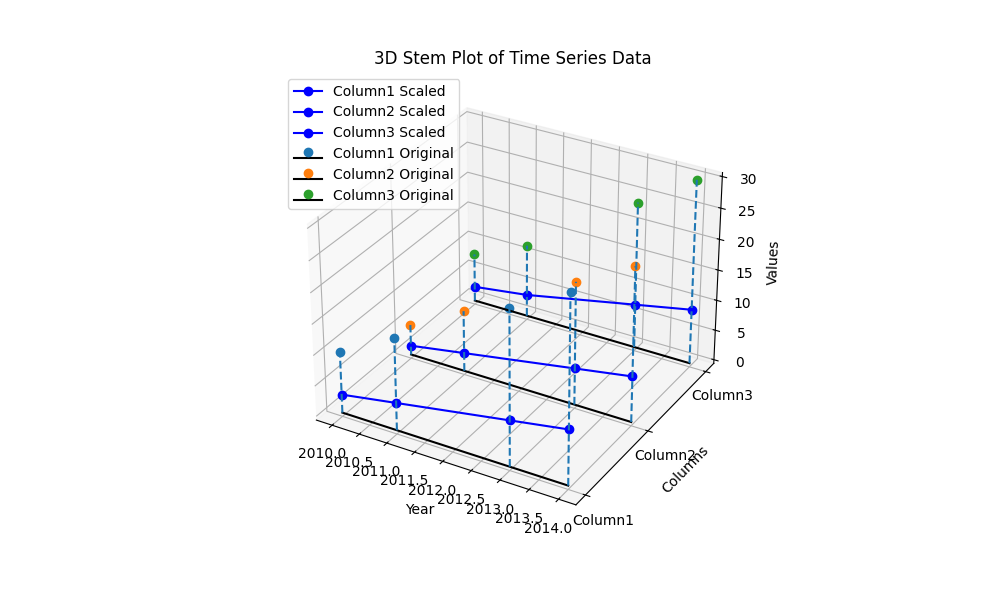

In [251]:
# Example usage
data = {'Year': [2010, 2011, 2012, 2013, 2014],
        'Column1': [10, 15, 20, 25, 30],
        'Column2': [5, 10, 15, 20, 25],
        'Column3': [8, 12, 18, 24, 30]}

df = pd.DataFrame(data)
df.set_index('Year', inplace=True)

plotter = InteractivePlotter( dataframe=df)
# plotter.plot_3d_bar(columns_to_include=['Column2', 'Column3'], scale_factor=2.0, show_original=True, years_subset=[2011, 2013, 2014])
# plotter.plot_3d_line(columns_to_include=['Column1', 'Column2', 'Column3'], add_average=False, scale_factor=2.0, show_original=True, years_subset=[2011, 2013, 2014])
plotter.plot_3d_stem(columns_to_include=['Column1', 'Column2', 'Column3'], add_average=False, scale_factor=0.3, show_original=True, years_subset=[2010, 2011, 2013, 2014])

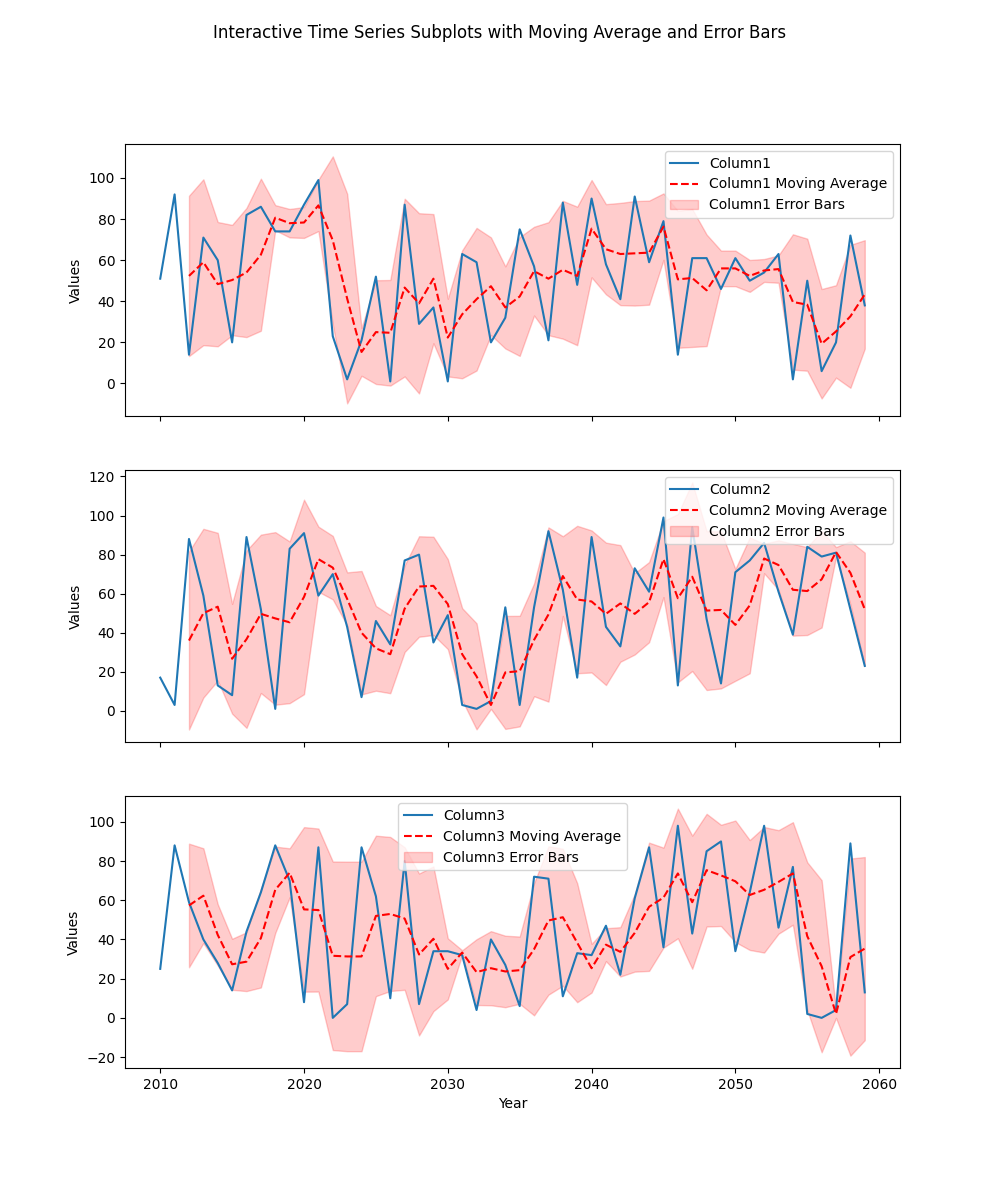

In [267]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

class InteractiveTimeSeriesPlotter:
    def __init__(self, dataframe):
        self.dataframe = dataframe

        # Enable interactive features
        %matplotlib widget

    def plot_interactive_time_series(self, years_subset=None, window_size=3):
        if years_subset is None:
            years_subset = self.dataframe.index

        num_columns = len(self.dataframe.columns)
        fig, axs = plt.subplots(num_columns, 1, figsize=(10, 4 * num_columns), sharex=True)

        for i, column in enumerate(self.dataframe.columns):
            values = self.dataframe[column].loc[years_subset].values

            axs[i].plot(years_subset, values, label=column)
            
            # Calculate moving average
            ma = pd.Series(values).rolling(window=window_size).mean()
            axs[i].plot(years_subset, ma, label=f'{column} Moving Average', linestyle='--', color='red')

            # Calculate standard deviation for error bars
            std = pd.Series(values).rolling(window=window_size).std()
            axs[i].fill_between(years_subset, ma - std, ma + std, color='red', alpha=0.2, label=f'{column} Error Bars')

            axs[i].set_ylabel('Values')
            axs[i].legend()

        axs[-1].set_xlabel('Year')
        plt.suptitle('Interactive Time Series Subplots with Moving Average and Error Bars')

        plt.show()

    def plot_all_on_one_plot(self, years_subset=None, window_size=3):
        fig, ax = plt.subplots(figsize=(10, 6))

        if years_subset is None:
            years_subset = self.dataframe.index

        for column in self.dataframe.columns:
            values = self.dataframe[column].loc[years_subset].values

            ax.plot(years_subset, values, label=column)
            
            # Calculate moving average
            ma = pd.Series(values).rolling(window=window_size).mean()
            ax.plot(years_subset, ma, label=f'{column} Moving Average', linestyle='--', color='red')

            # Calculate standard deviation for error bars
            std = pd.Series(values).rolling(window=window_size).std()
            ax.fill_between(years_subset, ma - std, ma + std, color='red', alpha=0.2, label=f'{column} Error Bars')

        ax.set_xlabel('Year')
        ax.set_ylabel('Values')
        ax.set_title('Interactive Time Series Plot with Moving Average and Error Bars')

        # Display legend
        ax.legend()

        plt.show()

# Generate random data
np.random.seed(42)
data = {'Year': list(range(2010, 2010 + 50)),
        'Column1': np.random.randint(0, 100, size=50),
        'Column2': np.random.randint(0, 100, size=50),
        'Column3': np.random.randint(0, 100, size=50)}

df = pd.DataFrame(data)
df.set_index('Year', inplace=True)

plotter = InteractiveTimeSeriesPlotter(dataframe=df)
plotter.plot_interactive_time_series(window_size=3)
#plotter.plot_all_on_one_plot(window_size=3)
